In [1]:
import zipline
from zipline.api import order_target, record, symbol, symbols, order_target_percent, schedule_function, date_rules, set_benchmark, set_cancel_policy
import pykalman
import random
random.seed(123)
from datetime import datetime
import pytz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys  
sys.path.insert(0, '/Users/cemalarican/Desktop/THESIS/')
from pipeLine import Pipeline


In [2]:
pipe_line = Pipeline(start_date='2014-01-01', end_date='2016-01-01', field='adj_close').make_pipeline()
pipe_line.shape

(504, 9611)

In [3]:
pipe_line

adj_close                                                       \
symbol              A   AAAP       AABA    AAC      AACG   AACH       AADR   
time                                                                         
2014-01-02  38.355574    NaN  10.877354    NaN  0.426140    NaN  36.142392   
2014-01-03  38.840051    NaN  11.022971    NaN  0.425544    NaN  36.209850   
2014-01-06  38.648990    NaN  10.970769    NaN  0.426627    NaN  35.929163   
2014-01-07  39.201703    NaN  11.242771    NaN  0.434207    NaN  36.210238   
2014-01-08  39.843123    NaN  11.270246    NaN  0.438538    NaN  36.345929   
2014-01-09  39.856771    NaN  11.242771    NaN  0.433124    NaN  36.229622   
2014-01-10  40.211599    NaN  11.327944    NaN  0.433124    NaN  36.297468   
2014-01-13  40.211599    NaN  10.987254    NaN  0.426627    NaN  35.815279   
2014-01-14  40.859843    NaN  11.303216    NaN  0.425544    NaN  36.277114   
2014-01-15  41.173729    NaN  11.283984    NaN  0.425544    NaN  36.273237   
2014-01-16  41.282907    NaN  11.083416    NaN  0.425544    NaN  36.312006   
2014-01-17  41.426203    NaN  10.992749    NaN  0.422296    NaN  36.160226   
2014-01-21  41.521734    NaN  10.858121    NaN  0.428793    NaN  36.384698   
2014-01-22  41.576323    NaN  11.039456    NaN  0.433124    NaN  36.520002   
2014-01-23  40.580074    NaN  10.822404    NaN  0.422307    NaN  36.026085   
2014-01-24  39.488295    NaN  10.415774    NaN  0.433124    NaN  35.066552   
2014-01-27  39.781711    NaN  10.069589    NaN  0.422296    NaN  34.796914   
2014-01-28  39.645238    NaN  10.500946    NaN  0.428793    NaN  34.872708   
2014-01-29  39.338175    NaN   9.586029    NaN  0.428793    NaN  34.572248   
2014-01-30  40.607369    NaN   9.701424    NaN  0.433124    NaN  34.983587   
2014-01-31  39.679356    NaN   9.893199    NaN  0.433124    NaN  35.127032   
2014-02-03  38.314632    NaN   9.588776    NaN  0.427959    NaN  34.403603   
2014-02-04  39.447353    NaN   9.797586    NaN  0.427710    NaN  34.882400   
2014-02-05  39.188056    NaN   9.750879    NaN  0.427710    NaN  34.504402   
2014-02-06  39.774887    NaN   9.956941    NaN  0.424462    NaN  35.144090   
2014-02-07  40.545956    NaN  10.228944    NaN  0.429876    NaN  35.135367   
2014-02-10  40.266188    NaN  10.374561    NaN  0.424462    NaN  35.427104   
2014-02-11  40.757488    NaN  10.577876    NaN  0.413634    NaN  35.722524   
2014-02-12  40.866666    NaN  10.470724    NaN  0.416449    NaN  35.432823   
2014-02-13  40.996315    NaN  10.583371    NaN  0.428793    NaN  35.619011   
...               ...    ...        ...    ...       ...    ...        ...   
2015-11-18  37.788678  25.00   9.061256  22.52  0.577632  22.52  37.593011   
2015-11-19  36.981802  25.90   8.963720  22.40  0.579995  22.40  38.403457   
2015-11-20  37.731044  25.20   9.096974  23.26  0.618976  23.26  38.559590   
2015-11-23  38.451468  25.15   9.165661  23.70  0.649689  23.70  38.374164   
2015-11-24  39.066231  25.62   9.055761  23.96  0.603620  23.96  38.286284   
2015-11-25  39.709810  25.80   9.110711  24.63  0.635514  24.63  38.540062   
2015-11-27  40.314967  26.50   9.050266  24.24  0.649689  24.24  37.925001   
2015-11-30  40.170882  26.44   9.289299  24.54  0.636707  24.54  38.188152   
2015-12-01  39.440852  26.58   9.261824  24.72  0.663864  24.72  38.408730   
2015-12-02  38.826089  26.44   9.794839  23.88  0.670360  23.88  38.032409   
2015-12-03  38.566736  26.64   9.434916  22.68  0.668589  22.68  38.229846   
2015-12-04  39.479274  26.50   9.591524  22.46  0.650870  22.46  38.315578   
2015-12-07  39.095048  29.01   9.528331  21.63  0.662682  21.63  38.157394   
2015-12-08  39.546514  29.42   9.575039  22.84  0.690087  22.84  37.964059   
2015-12-09  39.364006  29.56   9.451401  22.87  0.702845  22.87  37.459531   
2015-12-10  39.623359  29.50   9.514594  22.96  0.699301  22.96  37.745336   
2015-12-11  38.605159  29.21   9.042024  23.38  0.678039  23.38  37.745336   
2015-12-14  38.662793  29.64   8.9

In [4]:
def get_price(ticker, start, end, pipeline=pipe_line):
    return pd.Series(data=pipeline.loc[start:end].adj_close[ticker]).rename(ticker, inplce=True)

In [14]:
ivv = get_price('IVV', start='2014-12-25', end='2016-01-01')
iwb = get_price('IWB', start='2014-12-25', end='2016-01-01')


In [15]:
coint_pairs = pd.read_csv('/Users/cemalarican/Desktop/THESIS/PART 1/coint_pairs_to_investigate.csv')
coint_pairs

,stock1,stock2,constant,coeff,stat,p-value
0,MZZ,SMDD,1.721706e+01,0.653397,NON-STAT,6.567685e-02
1,EDV,UBT,1.901886e+01,1.156738,NON-STAT,1.173429e-01
2,IVV,IWB,-8.024626e+00,1.863519,STAT,2.437148e-02
3,DGL,SGOL,-3.365232e+00,3.555141,STAT,2.326552e-02
4,PHDG,VQT,-7.188207e-01,0.170467,STAT,5.418133e-07
5,IWV,SCHB,4.985746e+00,2.350143,NON-STAT,1.634537e-01
6,IWB,SPY,4.051654e+00,0.538618,STAT,1.627052e-02
7,IWB,SSO,4.734292e+01,0.912445,STAT,1.948852e-03
8,CURE,RXL,-1.056283e+01,0.340761,STAT,7.737721e-03
9,EUSA,VV,3.657650e-01,0.467233,STAT,1.498560e-13


In [16]:
beta = coint_pairs.iloc[2][3]
spread = ivv - beta*iwb
spread.values



array([-7.89949657, -7.94818867, -8.06280621, -7.99000038, -7.98048377,
       -7.9783617 , -7.74497235, -7.8415697 , -7.97031971, -7.90222573,
       -7.81556011, -7.97087728, -7.90906576, -7.8065546 , -7.8989017 ,
       -7.77061022, -7.85311852, -8.13455252, -8.1172293 , -8.31689538,
       -8.44763724, -8.18098621, -8.1547443 , -8.17313314, -8.07740943,
       -8.28839201, -8.31869832, -8.39945014, -8.46047788, -8.34669364,
       -8.42319521, -8.40092782, -8.53522298, -8.57800127, -8.52390343,
       -8.69557419, -8.74699239, -8.83952534, -8.81781247, -8.85162867,
       -8.84317462, -8.8050617 , -8.65575126, -8.82986934, -8.84696329,
       -8.75013362, -8.80626366, -8.76801441, -8.73027015, -8.69930667,
       -8.80871709, -8.83324594, -8.93515918, -8.87593131, -9.05776612,
       -9.18933517, -9.07661349, -9.28297715, -9.12354912, -9.1179141 ,
       -8.954042  , -8.93899438, -9.12063707, -9.20600633, -9.10679011,
       -8.96309412, -9.27230615, -9.24137512, -9.2748252 , -9.22

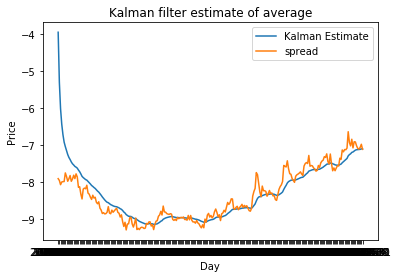

In [17]:
from pykalman import KalmanFilter

kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=.01)

# Use the observed values of the price to get a rolling mean
state_means, _ = kf.filter(spread.values)
state_means = pd.Series(state_means.flatten(), index=spread.index)



# Plot original data and estimated mean
plt.plot(state_means)
plt.plot(spread)

plt.title('Kalman filter estimate of average')
plt.legend(['Kalman Estimate', 'spread'])
plt.xlabel('Day')
plt.ylabel('Price');

In [19]:
state_means.reset_index()[0]

0     -3.949748
1     -5.300215
2     -6.013023
3     -6.430897
4     -6.711755
5     -6.915101
6     -7.036010
7     -7.144536
8     -7.248935
9     -7.327361
10    -7.383543
11    -7.448840
12    -7.498581
13    -7.531105
14    -7.569220
15    -7.589768
16    -7.616300
17    -7.667972
18    -7.712386
19    -7.771732
20    -7.837710
21    -7.871062
22    -7.898518
23    -7.925014
24    -7.939680
25    -7.973168
26    -8.006294
27    -8.043932
28    -8.083763
29    -8.108881
         ...   
226   -7.503879
227   -7.503833
228   -7.478296
229   -7.480208
230   -7.499959
231   -7.510420
232   -7.527103
233   -7.535228
234   -7.536514
235   -7.538713
236   -7.520604
237   -7.507228
238   -7.470983
239   -7.443029
240   -7.411753
241   -7.383953
242   -7.354579
243   -7.285978
244   -7.251620
245   -7.229186
246   -7.191824
247   -7.180206
248   -7.153888
249   -7.130636
250   -7.119510
251   -7.116019
252   -7.114687
253   -7.109207
254   -7.096162
255   -7.097403
Name: 0, Length: 256, dt

0     -7.899497
1     -7.948189
2     -8.062806
3     -7.990000
4     -7.980484
5     -7.978362
6     -7.744972
7     -7.841570
8     -7.970320
9     -7.902226
10    -7.815560
11    -7.970877
12    -7.909066
13    -7.806555
14    -7.898902
15    -7.770610
16    -7.853119
17    -8.134553
18    -8.117229
19    -8.316895
20    -8.447637
21    -8.180986
22    -8.154744
23    -8.173133
24    -8.077409
25    -8.288392
26    -8.318698
27    -8.399450
28    -8.460478
29    -8.346694
         ...   
226   -7.440640
227   -7.503398
228   -7.235376
229   -7.498389
230   -7.687840
231   -7.609938
232   -7.685797
233   -7.612511
234   -7.548751
235   -7.559634
236   -7.348341
237   -7.379984
238   -7.126204
239   -7.177118
240   -7.114243
241   -7.119507
242   -7.075156
243   -6.633416
244   -6.924792
245   -7.015774
246   -6.836420
247   -7.069695
248   -6.903539
249   -6.909451
250   -7.013673
251   -7.082807
252   -7.102020
253   -7.057073
254   -6.972078
255   -7.109201
Name: 0, Length: 256, dt

In [22]:
zscore = (spread - spread.mean())/spread.std()
kalman_score = (state_means - state_means.mean()) / state_means.std()
kalman_score


time
2014-12-26    5.873756
2014-12-29    4.049647
2014-12-30    3.086838
2014-12-31    2.522406
2015-01-02    2.143043
2015-01-05    1.868379
2015-01-06    1.705064
2015-01-07    1.558476
2015-01-08    1.417462
2015-01-09    1.311530
2015-01-12    1.235643
2015-01-13    1.147445
2015-01-14    1.080259
2015-01-15    1.036327
2015-01-16    0.984845
2015-01-20    0.957089
2015-01-21    0.921252
2015-01-22    0.851457
2015-01-23    0.791467
2015-01-26    0.711306
2015-01-27    0.622189
2015-01-28    0.577139
2015-01-29    0.540053
2015-01-30    0.504264
2015-02-02    0.484455
2015-02-03    0.439222
2015-02-04    0.394478
2015-02-05    0.343639
2015-02-06    0.289838
2015-02-09    0.255910
                ...   
2015-11-18    1.073102
2015-11-19    1.073164
2015-11-20    1.107657
2015-11-23    1.105076
2015-11-24    1.078397
2015-11-25    1.064266
2015-11-27    1.041733
2015-11-30    1.030759
2015-12-01    1.029021
2015-12-02    1.026051
2015-12-03    1.050511
2015-12-04    1.068579
2015-1

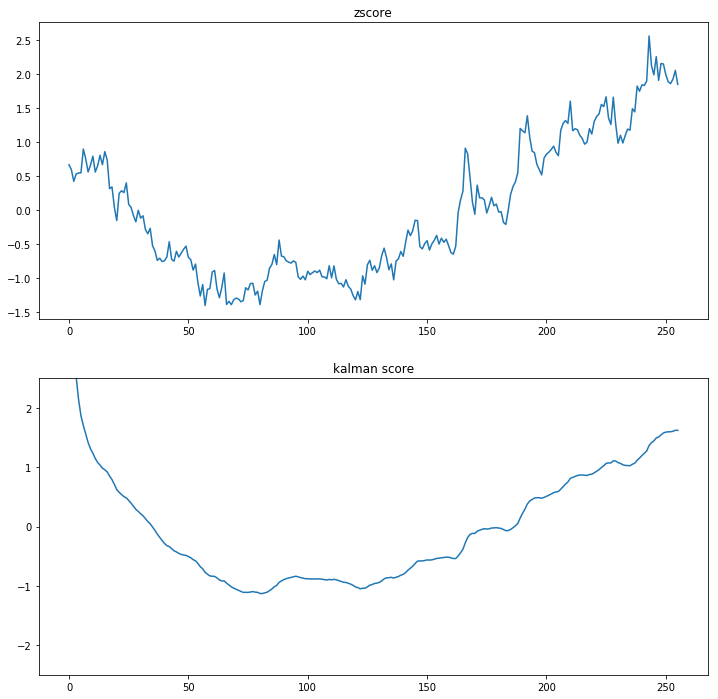

In [34]:
fig, (ax, ax1) = plt.subplots(2, figsize=(12, 12))

ax.plot(zscore.reset_index()[0])
ax.set_title('zscore')

ax1.plot(kalman_score.reset_index()[0])
ax1.set_title('kalman score')
ax1.set_ylim([-2.5,2.5])


plt.show()

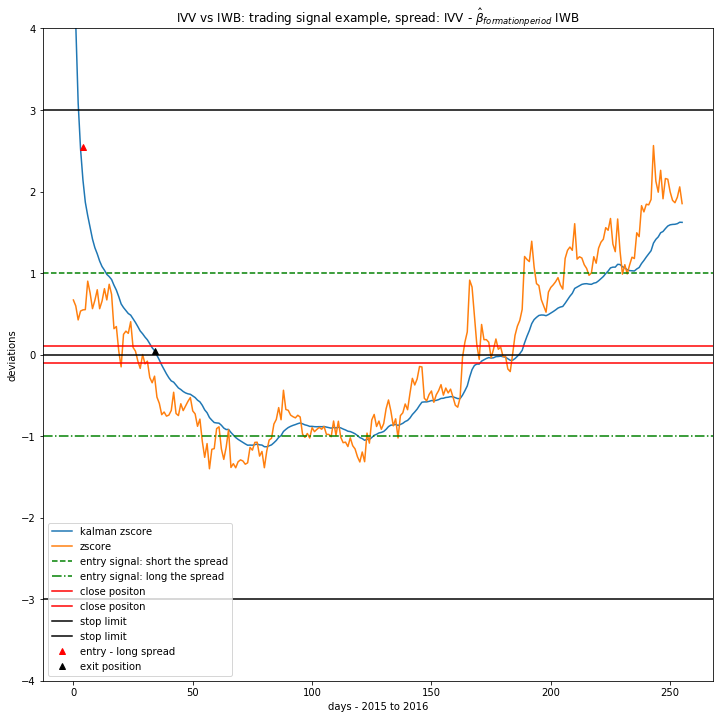

In [46]:
fig, ax = plt.subplots(figsize=(12,12))
ax.plot(kalman_score.reset_index()[0].rename('kalman zscore'))
ax.plot(zscore.reset_index()[0].rename('zscore'))
ax.set_ylim([-4, 4])
plt.axhline(y=1, c='green', ls='--', label='entry signal: short the spread')
plt.axhline(y=-1, c='green', ls='-.', label='entry signal: long the spread')
plt.axhline(y=0, c='black')
plt.axhline(y=0.1, c='red', label = 'close positon')
plt.axhline(y=-0.1, c='red', label= 'close positon')
plt.axhline(y=3, c='black', label='stop limit')
plt.axhline(y=-3, c='black', label='stop limit')
plt.plot(4, 2.55,'^', c='red', label='entry - long spread')
plt.plot(34, 0.05,'^', c='black', label='exit position')
plt.legend(loc='best')
plt.title(r'IVV vs IWB: trading signal example, spread: IVV - $\hat \beta_{formation period}$ IWB')
ax.set_ylabel('deviations')
ax.set_xlabel('days - 2015 to 2016')
plt.savefig('/Users/cemalarican/Desktop/trade_rule_ex_kalman.png')


In [43]:
kalman_score.reset_index()[0][34]

0.047909998580667836

/opt/anaconda3/envs/zipline/lib/python3.5/site-packages/pykalman/standard.py:1126: RuntimeWarning: covariance is not positive-semidefinite.
  observation_covariance.newbyteorder('=')


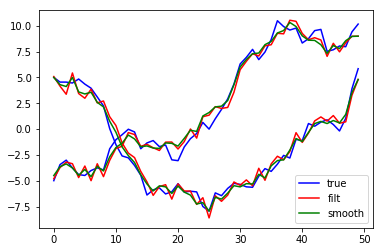

In [9]:

import numpy as np
import pylab as pl

from pykalman.datasets import load_robot
from pykalman import KalmanFilter


# specify parameters
random_state = np.random.RandomState(0)
transition_matrix = [[1, 0.1], [0, 1]]
transition_offset = [-0.1, 0.1]
observation_matrix = np.eye(2) + random_state.randn(2, 2) * 0.1
observation_offset = [1.0, -1.0]
transition_covariance = np.eye(2)
observation_covariance = np.eye(2) + random_state.randn(2, 2) * 0.1
initial_state_mean = [5, -5]
initial_state_covariance = [[1, 0.1], [-0.1, 1]]

# sample from model
kf = KalmanFilter(
    transition_matrix, observation_matrix, transition_covariance,
    observation_covariance, transition_offset, observation_offset,
    initial_state_mean, initial_state_covariance,
    random_state=random_state
)
states, observations = kf.sample(
    n_timesteps=50,
    initial_state=initial_state_mean
)

# estimate state with filtering and smoothing
filtered_state_estimates = kf.filter(observations)[0]
smoothed_state_estimates = kf.smooth(observations)[0]

# draw estimates
pl.figure()
lines_true = pl.plot(states, color='b')
lines_filt = pl.plot(filtered_state_estimates, color='r')
lines_smooth = pl.plot(smoothed_state_estimates, color='g')
pl.legend((lines_true[0], lines_filt[0], lines_smooth[0]),
          ('true', 'filt', 'smooth'),
          loc='lower right'
)
pl.show()